In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import datetime as dt
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [3]:
city_attributes=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/city_attributes.csv")
city_attributes

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683
5,San Diego,United States,32.715328,-117.157257
6,Las Vegas,United States,36.174969,-115.137222
7,Phoenix,United States,33.448380,-112.074043
8,Albuquerque,United States,35.084492,-106.651138
9,Denver,United States,39.739151,-104.984703


In [4]:
humidity=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/humidity.csv")
humidity['datetime'] = pd.to_datetime(humidity['datetime'])
humidity['date'] = humidity['datetime'].dt.date
#humidity.head()
lo_humidity=humidity.loc[:,["date","Los Angeles"]]
lo_humidity.head()

,date,Los Angeles
0,2012-10-01,NaN
1,2012-10-01,88.0
2,2012-10-01,88.0
3,2012-10-01,88.0
4,2012-10-01,88.0


In [5]:
pressure=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/pressure.csv")
pressure['datetime'] = pd.to_datetime(pressure['datetime'])
pressure['date'] = pressure['datetime'].dt.date
#pressure.head()
lo_pressure=pressure.loc[:,["date","Los Angeles"]]
lo_pressure.head()

,date,Los Angeles
0,2012-10-01,NaN
1,2012-10-01,1013.0
2,2012-10-01,1013.0
3,2012-10-01,1013.0
4,2012-10-01,1013.0


In [6]:
temperature=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/temperature.csv")
temperature['datetime'] = pd.to_datetime(temperature['datetime'])
temperature['date'] = temperature['datetime'].dt.date
#temperature.head()
lo_temp=temperature.loc[:,["date","Los Angeles"]]
lo_temp.head()

,date,Los Angeles
0,2012-10-01,NaN
1,2012-10-01,291.870000
2,2012-10-01,291.868186
3,2012-10-01,291.862844
4,2012-10-01,291.857503


In [7]:
weather_description=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/weather_description.csv")
weather_description.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,haze,NaN,NaN,NaN
1,2012-10-01 13:00:00,mist,scattered clouds,light rain,sky is clear,mist,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,overcast clouds,sky is clear,sky is clear,sky is clear,haze,sky is clear,sky is clear,sky is clear
2,2012-10-01 14:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,sky is clear,sky is clear,broken clouds,overcast clouds,sky is clear,overcast clouds
3,2012-10-01 15:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds
4,2012-10-01 16:00:00,broken clouds,scattered clouds,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,sky is clear,...,broken clouds,few clouds,sky is clear,few clouds,overcast clouds,sky is clear,broken clouds,overcast clouds,overcast clouds,overcast clouds


In [8]:
wind_direction=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/wind_direction.csv")
wind_direction.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,360.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,6.0,4.0,147.0,2.0,0.0,0.0,8.0,9.0,360.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,20.0,18.0,141.0,10.0,0.0,0.0,23.0,9.0,360.0,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,34.0,31.0,135.0,17.0,0.0,0.0,37.0,9.0,360.0,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0


In [12]:
wind_speed=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/wind_speed.csv")
wind_speed.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,2012-10-01 14:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,2012-10-01 15:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,2012-10-01 16:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0


In [13]:
humidity.isnull().sum()

datetime                0
Vancouver            1826
Portland              449
San Francisco         942
Seattle               289
Los Angeles           152
San Diego             344
Las Vegas             842
Phoenix              1308
Albuquerque           710
Denver               1808
San Antonio           564
Dallas                319
Houston               121
Kansas City           512
Minneapolis           510
Saint Louis          1289
Chicago              1109
Nashville             567
Indianapolis          695
Atlanta               422
Detroit               862
Jacksonville          209
Charlotte             589
Miami                1087
Pittsburgh            522
Toronto               728
Philadelphia          624
New York             1624
Montreal             1696
Boston                449
Beersheba             859
Tel Aviv District    1113
Eilat                 970
Haifa                 818
Nahariyya             817
Jerusalem             906
date                    0
dtype: int64

In [9]:
v_crime=pd.read_csv("/Users/rudranibhadra/Downloads/crime-in-vancouver/crime.csv")
v_crime.head()
#v_crime.info()

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y,Latitude,Longitude
0,Other Theft,2003,5,12,16.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
1,Other Theft,2003,5,7,15.0,20.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
2,Other Theft,2003,4,23,16.0,40.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
3,Other Theft,2003,4,20,11.0,15.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763
4,Other Theft,2003,4,12,17.0,45.0,9XX TERMINAL AVE,Strathcona,493906.5,5457452.47,49.269802,-123.083763


In [10]:
lo_crime=pd.read_csv("/Users/rudranibhadra/Downloads/crime-in-los-angeles/Crime_Data_2010_2017.csv")
lo_crime['Date Occurred'] = pd.to_datetime(lo_crime['Date Occurred'])
lo_crime.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,2013-03-11,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,2010-01-22,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,2013-03-18,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"
3,101822289,11/11/2010,2010-11-10,1800,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)"
4,42104479,01/11/2014,2014-01-04,2300,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)"


In [16]:
lo_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584316 entries, 0 to 1584315
Data columns (total 26 columns):
DR Number                 1584316 non-null int64
Date Reported             1584316 non-null object
Date Occurred             1584316 non-null datetime64[ns]
Time Occurred             1584316 non-null int64
Area ID                   1584316 non-null int64
Area Name                 1584316 non-null object
Reporting District        1584316 non-null int64
Crime Code                1584316 non-null int64
Crime Code Description    1583904 non-null object
MO Codes                  1412557 non-null object
Victim Age                1455657 non-null float64
Victim Sex                1439117 non-null object
Victim Descent            1439084 non-null object
Premise Code              1584240 non-null float64
Premise Description       1581565 non-null object
Weapon Used Code          524757 non-null float64
Weapon Description        524756 non-null object
Status Code               1584314

In [11]:
lo_humidity['Los Angeles'] = lo_humidity['Los Angeles'].fillna(lo_humidity.groupby('date')['Los Angeles'].transform('mean'))
#lo_humidity['Los Angeles'] = lo_humidity['Los Angeles'].fillna(lo_humidity['Los Angeles'].mean())

In [15]:
lo_temp.isnull().sum()

date           0
Los Angeles    0
dtype: int64

In [13]:
lo_pressure['Los Angeles'] = lo_pressure['Los Angeles'].fillna(lo_pressure.groupby('date')['Los Angeles'].transform('mean'))

In [14]:
lo_temp['Los Angeles'] = lo_temp['Los Angeles'].fillna(lo_temp.groupby('date')['Los Angeles'].transform('mean'))

In [22]:
lo_humidity.head()

,date,Los Angeles
0,2012-10-01,88.0
1,2012-10-01,88.0
2,2012-10-01,88.0
3,2012-10-01,88.0
4,2012-10-01,88.0


In [16]:
lo_humidity=lo_humidity.groupby(['date'])['Los Angeles'].mean().reset_index()

In [17]:
lo_pressure=lo_pressure.groupby(['date'])['Los Angeles'].mean().reset_index()

In [18]:
lo_temp=lo_temp.groupby(['date'])['Los Angeles'].mean().reset_index()

In [19]:
df1 = lo_crime.groupby(lo_crime['Date Occurred']).size().reset_index(name='No of crimes')

In [20]:
df1.head()

,Date Occurred,No of crimes
0,2010-01-01,2135
1,2010-01-02,533
2,2010-01-03,539
3,2010-01-04,558
4,2010-01-05,546


In [21]:
df1.rename(columns={'Date Occurred': 'date'}, inplace=True)

In [22]:
df1.head()

,date,No of crimes
0,2010-01-01,2135
1,2010-01-02,533
2,2010-01-03,539
3,2010-01-04,558
4,2010-01-05,546


In [23]:
data=pd.merge(lo_humidity,lo_pressure, on='date')

In [24]:
data.head()

,date,Los Angeles_x,Los Angeles_y
0,2012-10-01,88.000000,1013.000000
1,2012-10-02,64.916667,1012.750000
2,2012-10-03,44.875000,1009.875000
3,2012-10-04,66.625000,1012.375000
4,2012-10-05,70.250000,1017.142857


In [25]:
data1=pd.merge(data,lo_temp, on='date')

In [26]:
data1.head()

,date,Los Angeles_x,Los Angeles_y,Los Angeles
0,2012-10-01,88.000000,1013.000000,291.846501
1,2012-10-02,64.916667,1012.750000,295.890450
2,2012-10-03,44.875000,1009.875000,299.008542
3,2012-10-04,66.625000,1012.375000,295.997917
4,2012-10-05,70.250000,1017.142857,292.948333


In [30]:
data2=pd.merge(data1,df1,on='date')

In [29]:
data1['date'] = pd.to_datetime(data1['date'])

In [31]:
data2.head()

,date,Los Angeles_x,Los Angeles_y,Los Angeles,No of crimes
0,2012-10-01,88.000000,1013.000000,291.846501,864
1,2012-10-02,64.916667,1012.750000,295.890450,548
2,2012-10-03,44.875000,1009.875000,299.008542,546
3,2012-10-04,66.625000,1012.375000,295.997917,499
4,2012-10-05,70.250000,1017.142857,292.948333,623


In [32]:
data2.rename(columns={'Los Angeles_x': 'Avg Humidity', 'Los Angeles_y': 'Avg Pressure','Los Angeles':'Avg Temperature'}, inplace=True)

In [33]:
data2.head()

,date,Avg Humidity,Avg Pressure,Avg Temperature,No of crimes
0,2012-10-01,88.000000,1013.000000,291.846501,864
1,2012-10-02,64.916667,1012.750000,295.890450,548
2,2012-10-03,44.875000,1009.875000,299.008542,546
3,2012-10-04,66.625000,1012.375000,295.997917,499
4,2012-10-05,70.250000,1017.142857,292.948333,623


In [34]:
weather_description=pd.read_csv("/Users/rudranibhadra/Downloads/historical-hourly-weather-data/weather_description.csv")
weather_description.head()
weather_description['datetime'] = pd.to_datetime(weather_description['datetime'])
weather_description['date'] = weather_description['datetime'].dt.date
#humidity.head()
lo_rain=weather_description.loc[:,["date","Los Angeles"]]
lo_rain.head()

,date,Los Angeles
0,2012-10-01,NaN
1,2012-10-01,mist
2,2012-10-01,sky is clear
3,2012-10-01,sky is clear
4,2012-10-01,sky is clear


In [35]:
lo_rain['Los Angeles'].unique()

array([nan, 'mist', 'sky is clear', 'fog', 'haze', 'few clouds',
       'overcast clouds', 'scattered clouds', 'broken clouds',
       'light rain', 'thunderstorm with rain', 'moderate rain',
       'thunderstorm', 'shower rain', 'smoke', 'drizzle',
       'light intensity drizzle', 'heavy intensity rain',
       'light intensity shower rain', 'very heavy rain',
       'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm with heavy rain', 'squalls', 'dust',
       'proximity shower rain'], dtype=object)

In [36]:
#data.replace({'sky is clear': 0, 'fog': 0, 'haze': 0, 'few clouds': 0, 'mist': 0,'overcast clouds':0,'scattered clouds':0,'nan':0,'broken clouds':0,'light rain':1,''}, inplace=True)

In [37]:
lo_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 2 columns):
date           45253 non-null object
Los Angeles    45252 non-null object
dtypes: object(2)
memory usage: 707.2+ KB


In [38]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1805 entries, 0 to 1804
Data columns (total 5 columns):
date               1805 non-null datetime64[ns]
Avg Humidity       1805 non-null float64
Avg Pressure       1805 non-null float64
Avg Temperature    1805 non-null float64
No of crimes       1805 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 84.6 KB


In [132]:
data2

,date,Avg Humidity,Avg Pressure,Avg Temperature,No of crimes
0,2012-10-01,88.000000,1013.000000,291.846501,864
1,2012-10-02,64.916667,1012.750000,295.890450,548
2,2012-10-03,44.875000,1009.875000,299.008542,546
3,2012-10-04,66.625000,1012.375000,295.997917,499
4,2012-10-05,70.250000,1017.142857,292.948333,623
5,2012-10-06,75.041667,1017.166667,292.368750,542
6,2012-10-07,74.583333,1013.904762,292.928750,510
7,2012-10-08,73.250000,1012.541667,293.918750,503
8,2012-10-09,76.208333,1013.666667,292.440208,484
9,2012-10-10,70.416667,1013.250000,291.342708,529


In [39]:
lo_rain.isnull().sum()

date           0
Los Angeles    1
dtype: int64

In [40]:
lo_rain = lo_rain.dropna(subset=['Los Angeles'])

In [41]:
lo_rain.isnull().sum()

date           0
Los Angeles    0
dtype: int64

In [42]:
lo_rain.head()

,date,Los Angeles
1,2012-10-01,mist
2,2012-10-01,sky is clear
3,2012-10-01,sky is clear
4,2012-10-01,sky is clear
5,2012-10-01,sky is clear


In [150]:
lo_rain.groupby(['date'])['Los Angeles'].agg(pd.Series.mode).to_frame()

,Los Angeles
date,
2012-10-01,sky is clear
2012-10-02,sky is clear
2012-10-03,sky is clear
2012-10-04,sky is clear
2012-10-05,sky is clear
2012-10-06,sky is clear
2012-10-07,sky is clear
2012-10-08,sky is clear
2012-10-09,sky is clear


In [43]:
lo_rain=lo_rain.groupby('date')['Los Angeles'].agg(lambda x: x.value_counts().index[0]).to_frame().reset_index()

In [44]:
lo_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1887 entries, 0 to 1886
Data columns (total 2 columns):
date           1887 non-null object
Los Angeles    1887 non-null object
dtypes: object(2)
memory usage: 29.6+ KB


In [45]:
lo_rain['date'] = pd.to_datetime(lo_rain['date'])
data3=pd.merge(data2,lo_rain,on='date')

In [46]:
data3.head()

,date,Avg Humidity,Avg Pressure,Avg Temperature,No of crimes,Los Angeles
0,2012-10-01,88.000000,1013.000000,291.846501,864,sky is clear
1,2012-10-02,64.916667,1012.750000,295.890450,548,sky is clear
2,2012-10-03,44.875000,1009.875000,299.008542,546,sky is clear
3,2012-10-04,66.625000,1012.375000,295.997917,499,sky is clear
4,2012-10-05,70.250000,1017.142857,292.948333,623,sky is clear


In [47]:
data3.rename(columns={'Los Angeles': 'weather description'}, inplace=True)

In [48]:
data3=data3[['date','Avg Temperature','Avg Humidity','Avg Pressure','weather description','No of crimes']]

In [49]:
data3.head()

,date,Avg Temperature,Avg Humidity,Avg Pressure,weather description,No of crimes
0,2012-10-01,291.846501,88.000000,1013.000000,sky is clear,864
1,2012-10-02,295.890450,64.916667,1012.750000,sky is clear,548
2,2012-10-03,299.008542,44.875000,1009.875000,sky is clear,546
3,2012-10-04,295.997917,66.625000,1012.375000,sky is clear,499
4,2012-10-05,292.948333,70.250000,1017.142857,sky is clear,623


In [50]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1805 entries, 0 to 1804
Data columns (total 6 columns):
date                   1805 non-null datetime64[ns]
Avg Temperature        1805 non-null float64
Avg Humidity           1805 non-null float64
Avg Pressure           1805 non-null float64
weather description    1805 non-null object
No of crimes           1805 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 98.7+ KB


In [57]:
def f(x):
    x = x-273.15
    return float(x)

data3['Avg Temperature']=data3['Avg Temperature'].apply(f)

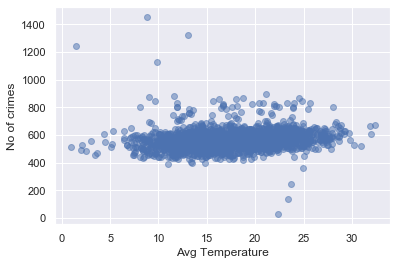

In [159]:
sns.set(color_codes=True)
plt.scatter(data3['Avg Temperature'],data3['No of crimes'],color='b',alpha=0.5)
# plt.scatter(df1,data3['No of crimes'],color='b',alpha=0.5)
plt.xlabel('Avg Temperature')
plt.ylabel('No of crimes')
plt.show()

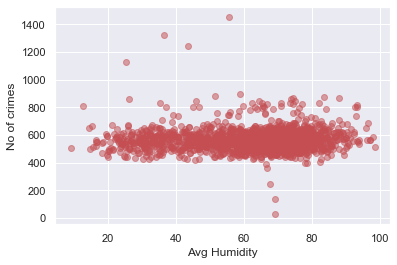

In [61]:
plt.scatter(data3['Avg Humidity'],data3['No of crimes'],color='r',alpha=0.5)
plt.xlabel('Avg Humidity')
plt.ylabel('No of crimes')
plt.show()

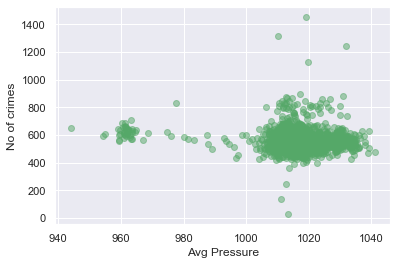

In [62]:
plt.scatter(data3['Avg Pressure'],data3['No of crimes'],color='g',alpha=0.5)
plt.xlabel('Avg Pressure')
plt.ylabel('No of crimes')
plt.show()

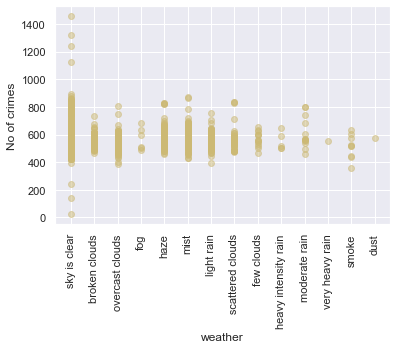

In [63]:
#tips = sns.load_dataset("data3")
#sns.catplot(data3['weather description'], data3['No of crimes'])
plt.scatter(data3['weather description'],data3['No of crimes'],color='y',alpha=0.5)
plt.xlabel('weather')
plt.ylabel('No of crimes')
plt.xticks(rotation=90)
plt.show()

In [70]:
# #weak correlation between weather conditions and crime
# #create dummy variables
# dummy=pd.get_dummies(data3['weather description'])
# dummy.head()

In [71]:
# data4=pd.concat([data3,dummy],axis=1)
# data4.head()

In [72]:
# data4=data4[['date','Avg Temperature','Avg Humidity','Avg Pressure','broken clouds','dust','few clouds','fog','haze','heavy intensity rain','light rain','mist','moderate rain','overcast clouds','scattered clouds','sky is clear','smoke','very heavy rain','weather description','No of crimes']]



In [73]:
# data4.head()

In [163]:
ch = data3[(data3['date'].dt.month == 12) & (data3['date'].dt.day.isin([24,25,26,27,28,29,31]))]

In [75]:
# x_test.head()

In [76]:
# x_test.info()

In [77]:
# x_train=data4[~data4.isin(x_test)].dropna(how = 'all')

In [78]:
# y_test=x_test['No of crimes'].reset_index()
# x_test = x_test.drop(['weather description', 'No of crimes'], axis=1)

In [79]:
# y_train=x_train['No of crimes'].reset_index()
# x_train = x_train.drop(['weather description', 'No of crimes'], axis=1)

In [80]:
# y_test.head()

In [81]:
# y_train.head()

In [82]:
# x_train.head()

In [83]:
# y_train = y_train.astype(int)

In [84]:
# y_train.head()

In [130]:
#x_test = x_test.drop(['date'], axis=1)
#x_train = x_train.drop(['date'], axis=1)
from sklearn.model_selection import train_test_split
#data3.head()
from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
X=pd.DataFrame(data3[['Avg Temperature','Avg Humidity','Avg Pressure']])
#x_scaled = min_max_scaler.fit_transform(X)
#x_new = pd.DataFrame(x_scaled)
y=pd.DataFrame(data3.iloc[:,5])
#x_new.head()
#plt.plot(x_new)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)
X_train.head()
# data3.info()
X_train1=pd.DataFrame(X_train['Avg Temperature'])
X_test1=pd.DataFrame(X_test['Avg Temperature'])
X_train2=pd.DataFrame(X_train['Avg Humidity'])
X_test2=pd.DataFrame(X_test['Avg Humidity'])
X_train3=pd.DataFrame(X_train['Avg Pressure'])
X_test3=pd.DataFrame(X_test['Avg Pressure'])

[524.64280253]
[[2.42419917]]


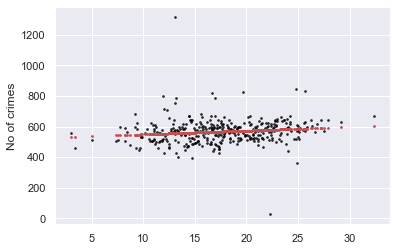

In [187]:
lr=LinearRegression()

lr.fit(X_train1, y_train)
prediction=lr.predict(np.sort(X_train1, axis=0))

y_pred = lr.predict(X_test1)
print(lr.intercept_)
print(lr.coef_)
# plt.title('Comparison of Y values in test and the Predicted values')
# plt.ylabel('Test Set')
# plt.xlabel('Predicted values')
# plt.scatter(y_pred, y_test,  color='black')
plt.scatter(X_test1, y_test,  color='black',alpha=0.7,s=3)
plt.scatter(X_test1, y_pred, color='r',alpha=1,s=3)
plt.ylabel('No of crimes')
plt.show()

#plt.scatter(x_train, y_train)
#plt.plot(np.sort(x_train, axis=0),prediction)
#plt.show()

[555.02727487]
[[0.19499699]]


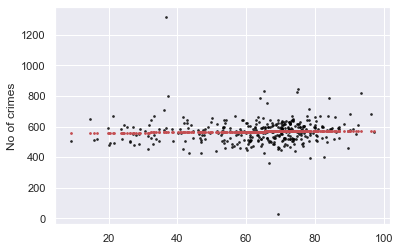

In [188]:
lr=LinearRegression()

lr.fit(X_train2, y_train)
prediction=lr.predict(np.sort(X_train2, axis=0))

y_pred = lr.predict(X_test2)
print(lr.intercept_)
print(lr.coef_)
# plt.title('Comparison of Y values in test and the Predicted values')
# plt.ylabel('Test Set')
# plt.xlabel('Predicted values')
# plt.scatter(y_pred, y_test,  color='black')
plt.scatter(X_test2, y_test,  color='black',alpha=0.7,s=3)
plt.scatter(X_test2, y_pred, color='r',alpha=1,s=3)
plt.ylabel('No of crimes')
plt.show()

[1343.48973592]
[[-0.76405923]]


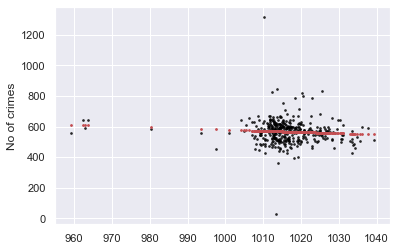

In [189]:
lr=LinearRegression()

lr.fit(X_train3, y_train)
prediction=lr.predict(np.sort(X_train3, axis=0))

y_pred = lr.predict(X_test3)
print(lr.intercept_)
print(lr.coef_)
# plt.title('Comparison of Y values in test and the Predicted values')
# plt.ylabel('Test Set')
# plt.xlabel('Predicted values')
# plt.scatter(y_pred, y_test,  color='black')
plt.scatter(X_test3, y_test,  color='black',alpha=0.7,s=3)
plt.scatter(X_test3, y_pred, color='r',alpha=1,s=3)
plt.ylabel('No of crimes')
plt.show()

In [165]:
lr=LinearRegression()

lr.fit(X_train, y_train)
prediction=lr.predict(np.sort(X_train, axis=0))

y_pred = lr.predict(X_test)
print(lr.intercept_)
print(lr.coef_)
# plt.title('Comparison of Y values in test and the Predicted values')
# plt.ylabel('Test Set')
# plt.xlabel('Predicted values')
# plt.scatter(y_pred, y_test,  color='black')
# plt.scatter(X_test3, y_test,  color='black',alpha=0.7,s=3)
# plt.scatter(X_test3, y_pred, color='r',alpha=1,s=3)
# plt.show()
# plt.xlim([400,800])
# plt.ylim([400,800])
# plt.scatter(y_test,y_pred)

[1001.82616094]
[[ 2.2005506   0.23899893 -0.4805818 ]]


In [184]:
X_new = pd.DataFrame({'Avg Temperature': [12],'Avg Humidity':[48],'Avg Pressure':[1000]})
lr.predict(X_new)

array([[559.12291411]])

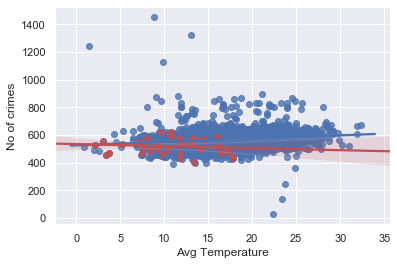

In [164]:
sns.set(color_codes=True)
sns.regplot(data3['Avg Temperature'],data3['No of crimes'], color='b')
sns.regplot(ch['Avg Temperature'],ch['No of crimes'],color='r')

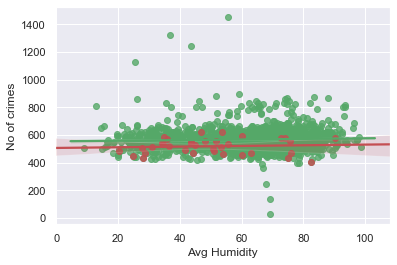

In [154]:
sns.set(color_codes=True)
sns.regplot(data3['Avg Humidity'], data3['No of crimes'], color='g')
sns.regplot(ch['Avg Humidity'],ch['No of crimes'],color='r')

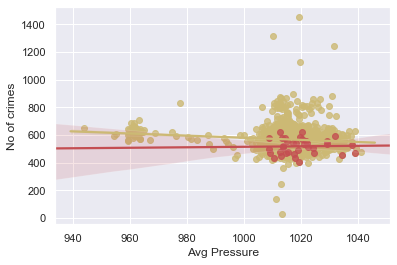

In [155]:
sns.set(color_codes=True)
sns.regplot(data3['Avg Pressure'], data3['No of crimes'], color='y')
sns.regplot(ch['Avg Pressure'],ch['No of crimes'],color='r')

In [58]:
#avg no of crimes in summer and winter months
#summer
sm = data3[(data3['date'].dt.month == 5) | (data3['date'].dt.month == 6) | (data3['date'].dt.month == 7) | (data3['date'].dt.month == 8)]
#winter
wn = data3[(data3['date'].dt.month == 11) | (data3['date'].dt.month == 12) | (data3['date'].dt.month == 1) | (data3['date'].dt.month == 2)]


The average number of incidents in the winter months in Los Angeles is: 553.6788685524126


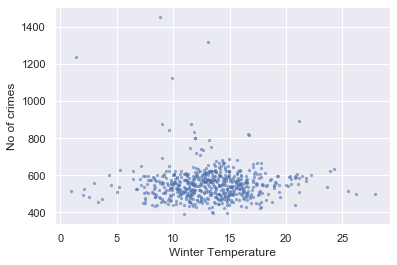

In [186]:
# plt.scatter(sm['Avg Temperature'], sm['No of crimes'], color='r',alpha=0.5,s=5)
plt.scatter(wn['Avg Temperature'], wn['No of crimes'], color='b',alpha=0.5,s=5)
plt.xlabel('Winter Temperature')
plt.ylabel('No of crimes')
print("The average number of incidents in the winter months in Los Angeles is:", np.mean(wn['No of crimes']))

The average number of incidents in the summer months in Los Angeles is: 582.089430894309


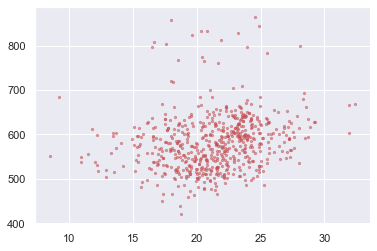

In [182]:
plt.scatter(sm['Avg Temperature'], sm['No of crimes'], color='r',alpha=0.5,s=5)
plt.xlabel('Summer Temperature')
plt.ylabel('No of crimes')
print("The average number of incidents in the summer months in Los Angeles is:", np.mean(sm['No of crimes']))

In [183]:
ch.head()

,date,Avg Temperature,Avg Humidity,Avg Pressure,weather description,No of crimes
84,2012-12-24,13.089583,75.500000,1021.750000,mist,553
85,2012-12-25,13.410417,82.541667,1019.125000,overcast clouds,404
86,2012-12-26,11.740000,75.125000,1018.000000,mist,434
87,2012-12-27,11.792500,75.916667,1014.791667,mist,471
88,2012-12-28,11.660000,48.086957,1015.041667,sky is clear,557


In [60]:
s=sm.groupby(['Avg Temperature'])['No of crimes'].mean().reset_index()
w=wn.groupby(['Avg Temperature'])['No of crimes'].mean().reset_index()
s.head()


,Avg Temperature,No of crimes
0,8.575354,551.0
1,9.239104,685.0
2,10.934854,539.0
3,10.994937,549.0
4,11.525271,556.0


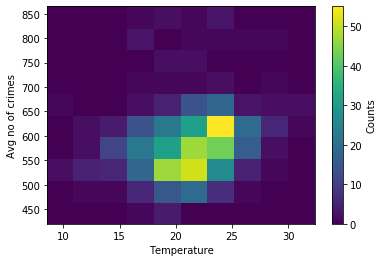

In [69]:
#plt.hist2d(s['Avg Temperature'], s['No of crimes'])
plt.hist2d(sm['Avg Temperature'], sm['No of crimes'])
#plt.hist2d(w['Avg Temperature'], w['No of crimes'])
plt.xlabel('Temperature')
plt.ylabel('Avg no of crimes')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.show()

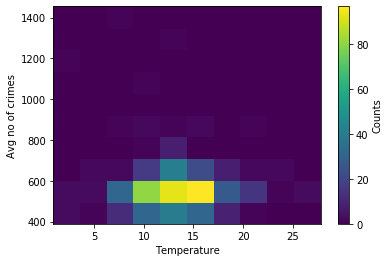

In [70]:
#plt.hist2d(s['Avg Temperature'], s['No of crimes'])
plt.hist2d(wn['Avg Temperature'], wn['No of crimes'])
#plt.hist2d(w['Avg Temperature'], w['No of crimes'])
plt.xlabel('Temperature')
plt.ylabel('Avg no of crimes')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
plt.show()